In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# Load the data
data = pd.read_csv("50_Startups.csv")

# Data Cleaning and Preprocessing
# Drop rows with missing values
data = data.dropna()

# Remove zeroes

# Remove rows where 'R&D Spend' is 0
data = data[data['R&D Spend'] != 0]

# Remove rows where 'Marketing Spend' is 0
data = data[data['Marketing Spend'] != 0]

# Removing outliers
data = data[(data['Profit'] >= np.percentile(data['Profit'], 5)) & (data['Profit'] <= np.percentile(data['Profit'], 95))]

# Encoding categorical variable 'State' using one-hot encoding
data = pd.get_dummies(data, columns=['State'], drop_first=True)

print(data.head())
data.describe()

   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   
5  131876.90        99814.71        362861.36  156991.12          False   
6  134615.46       147198.87        127716.82  156122.51          False   
7  130298.13       145530.06        323876.68  155752.60           True   

   State_New York  
3            True  
4           False  
5            True  
6           False  
7           False  


,R&D Spend,Administration,Marketing Spend,Profit
count,40.000000,40.000000,40.000000,40.000000
mean,77330.929750,120634.191750,221377.788750,115755.478000
std,35983.918938,27567.214984,90848.542021,28390.439924
min,15505.730000,51283.140000,35534.170000,69758.980000
25%,53226.980000,102246.795000,146144.535000,96762.390000
50%,74661.715000,122107.195000,221897.880000,108643.015000
75%,100982.240000,144371.380000,298932.675000,136126.892500
max,144372.410000,182645.560000,383199.620000,182901.990000


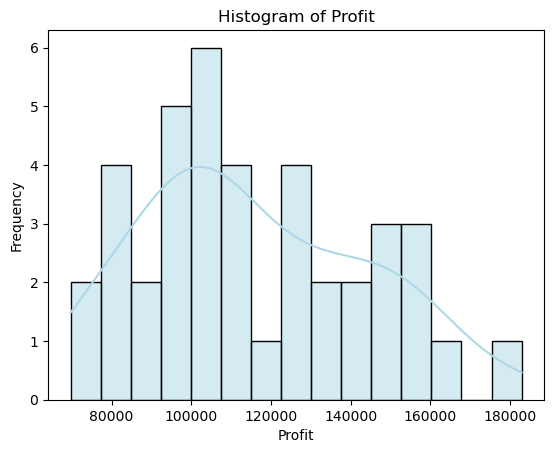

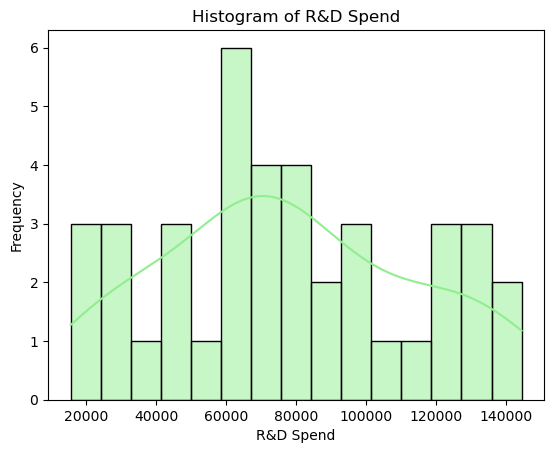

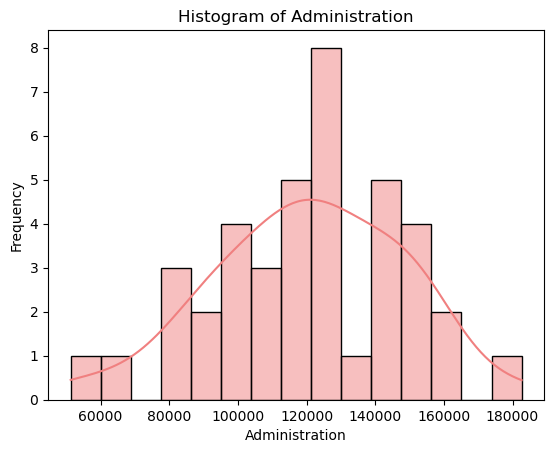

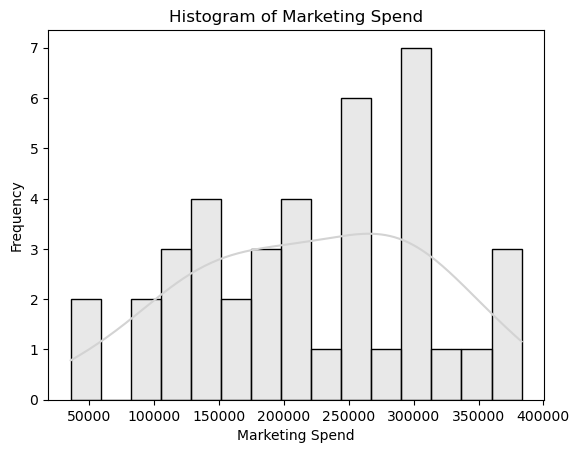

In [42]:
# Univariate plots for analysis
# Histograms

sns.histplot(data['Profit'], bins=15, kde=True, color='lightblue')
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['R&D Spend'], bins=15, kde=True, color='lightgreen')
plt.title('Histogram of R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['Administration'], bins=15, kde=True, color='lightcoral')
plt.title('Histogram of Administration')
plt.xlabel('Administration')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['Marketing Spend'], bins=15, kde=True, color='lightgrey')
plt.title('Histogram of Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Frequency')
plt.show()

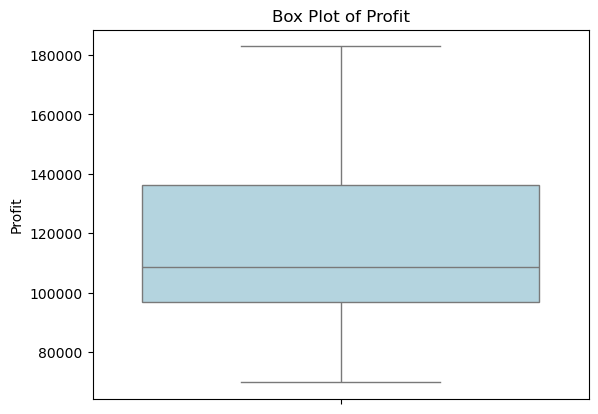

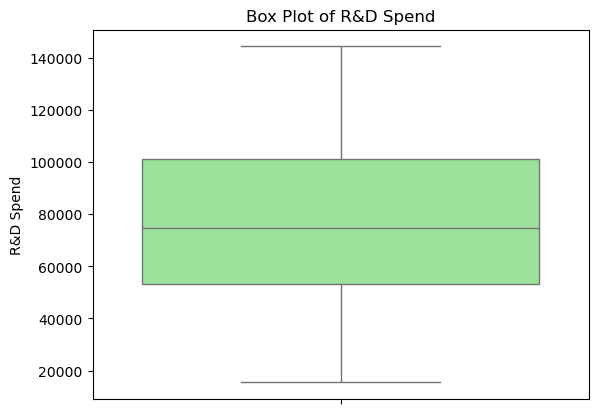

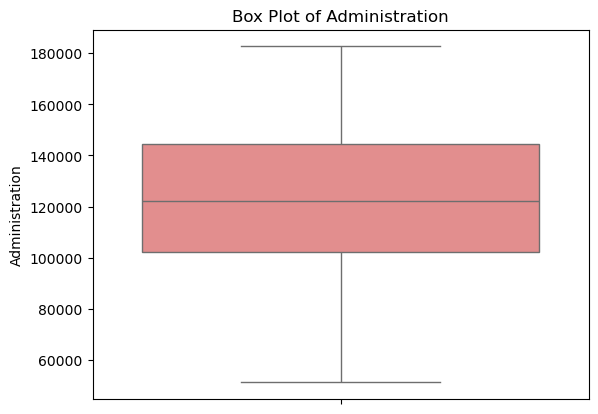

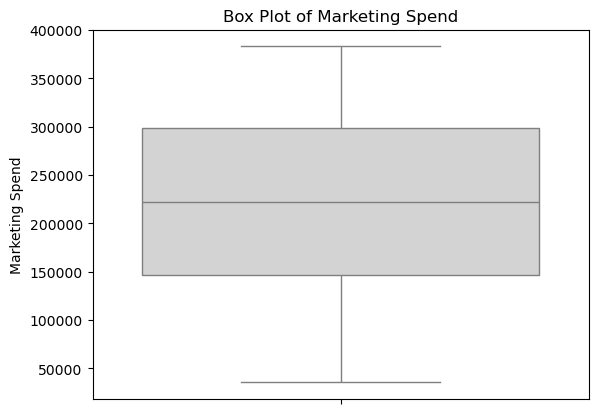

In [43]:
# Box plots 
sns.boxplot(y=data['Profit'], color='lightblue')
plt.title('Box Plot of Profit')
plt.ylabel('Profit')
plt.show()

sns.boxplot(y=data['R&D Spend'], color='lightgreen')
plt.title('Box Plot of R&D Spend')
plt.ylabel('R&D Spend')
plt.show()

sns.boxplot(y=data['Administration'], color='lightcoral')
plt.title('Box Plot of Administration')
plt.ylabel('Administration')
plt.show()

sns.boxplot(y=data['Marketing Spend'], color='lightgrey')
plt.title('Box Plot of Marketing Spend')
plt.ylabel('Marketing Spend')
plt.show()

In [44]:
r_squared_results = {'Transformation': [], 'R-squared': []}

# Model Building with Transformations
# Creating multiple linear regression models with different transformations
transformations = ['log', 'sqrt', 'power2']

for transformation in transformations:
    # Apply transformation to the numerical features
    data_transformed = data.copy()
    
    if transformation == 'power2':
        data_transformed['R&D Spend'] = np.power(data_transformed['R&D Spend'], 2)
        data_transformed['Administration'] = np.power(data_transformed['Administration'], 2)
        data_transformed['R&D SpendMarketing Spend'] = np.power(data_transformed['Marketing Spend'], 2)
    else:   
        data_transformed['R&D Spend'] = getattr(np, transformation)(data_transformed['R&D Spend'])
        data_transformed['Administration'] = getattr(np, transformation)(data_transformed['Administration'])
        data_transformed['Marketing Spend'] = getattr(np, transformation)(data_transformed['Marketing Spend'])

    # Split the data into features (X) and target variable (y)
    X = data_transformed.drop('Profit', axis=1)
    y = data_transformed['Profit']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Get R-squared value
    r2 = r2_score(y_test, y_pred)
    
    # Storing the R squared datas to create a table
    r_squared_results['Transformation'].append(transformation)
    r_squared_results['R-squared'].append(r2)
    
# Convert the dictionary to a DataFrame
r_squared_df = pd.DataFrame(r_squared_results)

print("R-squared Values for Each Transformation:")
print(r_squared_df)

R-squared Values for Each Transformation:
  Transformation  R-squared
0            log   0.831999
1           sqrt   0.902147
2         power2   0.892482
